In [1]:
#Packages

In [2]:
import numpy as np
import pandas as pd #to read dataset
#for graphics of best model
import matplotlib.pyplot as plt
import seaborn as sns
#import tensorflow as tf
from tensorflow import keras

# gradient boosting 
from xgboost import XGBRegressor

# random forest
from sklearn.ensemble import RandomForestRegressor

# evaluation metrics
from sklearn.metrics import mean_squared_error #mean_squared_error(y_true, y_pred)
from sklearn.metrics import r2_score #r2_score(y_true, y_pred)

#For the decision tree graphic
#Need: pip install pydot and pip install graphviz and sudo pip install pydot and pip install graphviz, update nope need to install homebrew then: brew install graphviz
import pydot
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

#For cluster graphics
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

In [3]:
#Data & Splitting

In [4]:
#Dataset 
df = pd.read_csv('12kr2.csv')
print(df.columns)
print(df.shape)
print(df.dtypes)

Index(['FOUND_BY', 'DTXSID', 'PREFERRED_NAME', 'CASRN', 'MOLECULAR_FORMULA',
       'MONOISOTOPIC_MASS', 'Number of Carbons', 'Number of Fluorines',
       'Contains N', 'Contains O',
       'ATMOSPHERIC_HYDROXYLATION_RATE_(AOH)_CM3/MOLECULE*SEC_OPERA_PRED',
       'BIOCONCENTRATION_FACTOR_OPERA_PRED',
       'BIODEGRADATION_HALF_LIFE_DAYS_DAYS_OPERA_PRED',
       'BOILING_POINT_DEGC_OPERA_PRED', 'HENRYS_LAW_ATM-M3/MOLE_OPERA_PRED',
       'OPERA_KM_DAYS_OPERA_PRED',
       'OCTANOL_AIR_PARTITION_COEFF_LOGKOA_OPERA_PRED',
       'SOIL_ADSORPTION_COEFFICIENT_KOC_L/KG_OPERA_PRED',
       'OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED',
       'MELTING_POINT_DEGC_OPERA_PRED', 'VAPOR_PRESSURE_MMHG_OPERA_PRED',
       'WATER_SOLUBILITY_MOL/L_OPERA_PRED', 'Acid Group', 'Hyde Group',
       'Carbon Ring Group', 'Alcohol Group', 'Ether Linkage',
       'Linear Vs. Branched', 'ide', 'ate', 'ite', 'sodium', 'polymer',
       'telomer', 'nitrile', 'Bis', 'Amide', 'Amine', 'Si', 'Sulfur',
       'number

In [5]:
#first, separate the full df into 2 by rows assigning some % of the rows to training and some to testing, for example by

train = df.sample(frac=0.8, random_state=200)
test = df.drop(train.index)

#in this way you slice your data horizontally.

#then, identify which columns should be in your training data (X) and which in your training labels(Y). Then explicitly select them:

X_train = train[['MONOISOTOPIC_MASS', 'Number of Carbons', 'Number of Fluorines',
       'Contains N', 'Contains O',
       'ATMOSPHERIC_HYDROXYLATION_RATE_(AOH)_CM3/MOLECULE*SEC_OPERA_PRED',
       'BIODEGRADATION_HALF_LIFE_DAYS_DAYS_OPERA_PRED',
       'BOILING_POINT_DEGC_OPERA_PRED', 'HENRYS_LAW_ATM-M3/MOLE_OPERA_PRED',
       'OPERA_KM_DAYS_OPERA_PRED',
       'OCTANOL_AIR_PARTITION_COEFF_LOGKOA_OPERA_PRED',
       'SOIL_ADSORPTION_COEFFICIENT_KOC_L/KG_OPERA_PRED',
       'OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED',
       'MELTING_POINT_DEGC_OPERA_PRED', 'VAPOR_PRESSURE_MMHG_OPERA_PRED',
       'WATER_SOLUBILITY_MOL/L_OPERA_PRED', 'Acid Group', 'Hyde Group',
       'Carbon Ring Group', 'Alcohol Group', 'Ether Linkage',
       'Linear Vs. Branched', 'ide', 'ate', 'ite', 'sodium', 'polymer',
       'telomer', 'nitrile', 'Bis', 'Amide', 'Amine', 'Si', 'Sulfur',]].values.astype(float)
y_train = train['BIOCONCENTRATION_FACTOR_OPERA_PRED'].values.astype(float) 

#Note that columns should be the same for training and testing, including the order:

X_test = test[['MONOISOTOPIC_MASS', 'Number of Carbons', 'Number of Fluorines',
       'Contains N', 'Contains O',
       'ATMOSPHERIC_HYDROXYLATION_RATE_(AOH)_CM3/MOLECULE*SEC_OPERA_PRED',
       'BIODEGRADATION_HALF_LIFE_DAYS_DAYS_OPERA_PRED',
       'BOILING_POINT_DEGC_OPERA_PRED', 'HENRYS_LAW_ATM-M3/MOLE_OPERA_PRED',
       'OPERA_KM_DAYS_OPERA_PRED',
       'OCTANOL_AIR_PARTITION_COEFF_LOGKOA_OPERA_PRED',
       'SOIL_ADSORPTION_COEFFICIENT_KOC_L/KG_OPERA_PRED',
       'OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED',
       'MELTING_POINT_DEGC_OPERA_PRED', 'VAPOR_PRESSURE_MMHG_OPERA_PRED',
       'WATER_SOLUBILITY_MOL/L_OPERA_PRED', 'Acid Group', 'Hyde Group',
       'Carbon Ring Group', 'Alcohol Group', 'Ether Linkage',
       'Linear Vs. Branched', 'ide', 'ate', 'ite', 'sodium', 'polymer',
       'telomer', 'nitrile', 'Bis', 'Amide', 'Amine', 'Si', 'Sulfur',]].values.astype(float)
y_test = test['BIOCONCENTRATION_FACTOR_OPERA_PRED'].values.astype(float)

In [6]:
#Function to evaluate RMSE

In [7]:
def model_evaluate(y_train, y_test, y_pred, y_pred_train):
    metrics = {}
    #RMSE Test
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
    #RMSE Train
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    #MSE Test
    mse_test = mean_squared_error(y_test, y_pred)
    #MSE Train
    mse_train = mean_squared_error(y_train, y_pred_train)
    #R2 Test
    r2_test = r2_score(y_test, y_pred)
    #R2 Train
    r2_train = r2_score(y_train, y_pred_train)

    metrics = {
              'RMSE Test': rmse_test,
              'RMSE Train': rmse_train,
              'MSE Test': mse_test,
              'MSE Train': mse_train,
              'R2 Test': r2_test,
              'R2 Train': r2_train}

    return metrics 

In [8]:
#Iteration 1: Using the model with default hyperparameters

In [9]:
#1. import the class/model
#from sklearn.ensemble import RandomForestRegressor
#2. Instantiate the estimator
model = RandomForestRegressor(random_state = 1, n_jobs = -1) 
#model = XGBRegressor(random_state = 1, n_jobs = -1)
#3. Fit the model with data aka model training
model.fit(X_train, y_train)

#4. Predict the response for a new observation
y_pred = model.predict(X_test)


y_pred_train = model.predict(X_train)

In [10]:
model_evaluate(y_train, y_test, y_pred, y_pred_train)

{'RMSE Test': 17375.424235500614,
 'RMSE Train': 7467.059262965925,
 'MSE Test': 301905367.3636221,
 'MSE Train': 55756974.03664522,
 'R2 Test': 0.6044723335350174,
 'R2 Train': 0.8982590723657468}

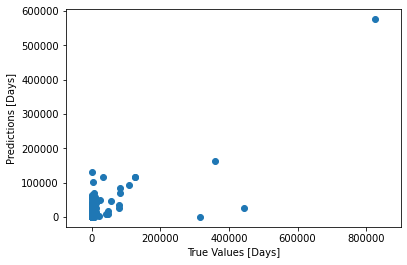

In [11]:
test_predictions = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('True Values [Days]')
plt.ylabel('Predictions [Days]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

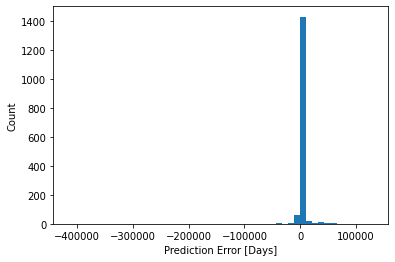

In [12]:
# histogram
error = y_pred - y_test
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error [Days]")
_ = plt.ylabel("Count")

In [13]:
def plot_feature_importance(importance, names):
    '''
    this code is from here: 
    https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html
    '''
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title('FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [14]:
dfxTrain=pd.DataFrame(X_train, columns=['MONOISOTOPIC_MASS', 'Number of Carbons', 'Number of Fluorines',
       'Contains N', 'Contains O',
       'ATMOSPHERIC_HYDROXYLATION_RATE_(AOH)_CM3/MOLECULE*SEC_OPERA_PRED',
       'BIODEGRADATION_HALF_LIFE_DAYS_DAYS_OPERA_PRED',
       'BOILING_POINT_DEGC_OPERA_PRED', 'HENRYS_LAW_ATM-M3/MOLE_OPERA_PRED',
       'OPERA_KM_DAYS_OPERA_PRED',
       'OCTANOL_AIR_PARTITION_COEFF_LOGKOA_OPERA_PRED',
       'SOIL_ADSORPTION_COEFFICIENT_KOC_L/KG_OPERA_PRED',
       'OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED',
       'MELTING_POINT_DEGC_OPERA_PRED', 'VAPOR_PRESSURE_MMHG_OPERA_PRED',
       'WATER_SOLUBILITY_MOL/L_OPERA_PRED', 'Acid Group', 'Hyde Group',
       'Carbon Ring Group', 'Alcohol Group', 'Ether Linkage',
       'Linear Vs. Branched', 'ide', 'ate', 'ite', 'sodium', 'polymer',
       'telomer', 'nitrile', 'Bis', 'Amide', 'Amine', 'Si', 'Sulfut',])


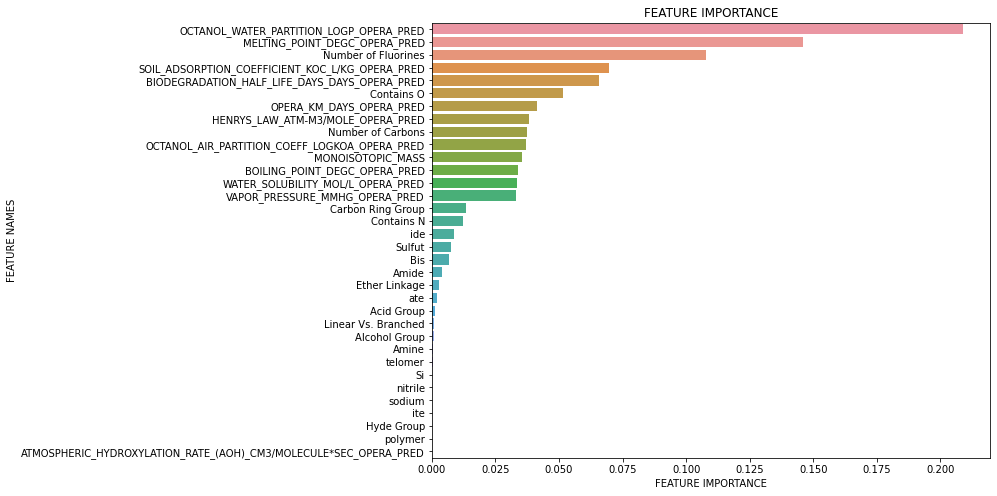

In [15]:
plot_feature_importance(model.feature_importances_, dfxTrain.columns)

In [16]:
#Extract List of features from data frame.
feature_list = list(dfxTrain.columns)
# Get numerical feature importances
importances = list(model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED Importance: 0.21
Variable: MELTING_POINT_DEGC_OPERA_PRED Importance: 0.15
Variable: Number of Fluorines  Importance: 0.11
Variable: BIODEGRADATION_HALF_LIFE_DAYS_DAYS_OPERA_PRED Importance: 0.07
Variable: SOIL_ADSORPTION_COEFFICIENT_KOC_L/KG_OPERA_PRED Importance: 0.07
Variable: Contains O           Importance: 0.05
Variable: MONOISOTOPIC_MASS    Importance: 0.04
Variable: Number of Carbons    Importance: 0.04
Variable: HENRYS_LAW_ATM-M3/MOLE_OPERA_PRED Importance: 0.04
Variable: OPERA_KM_DAYS_OPERA_PRED Importance: 0.04
Variable: OCTANOL_AIR_PARTITION_COEFF_LOGKOA_OPERA_PRED Importance: 0.04
Variable: BOILING_POINT_DEGC_OPERA_PRED Importance: 0.03
Variable: VAPOR_PRESSURE_MMHG_OPERA_PRED Importance: 0.03
Variable: WATER_SOLUBILITY_MOL/L_OPERA_PRED Importance: 0.03
Variable: Contains N           Importance: 0.01
Variable: Carbon Ring Group    Importance: 0.01
Variable: ide                  Importance: 0.01
Variable: Bis                 

In [17]:
#Iteration 2: I used RandomizedSearchCV to get optimum values of hyper-parameters

In [18]:
#from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 100, random_state = 1, n_jobs = -1) 

param_grid = { 
    'max_features' : ["auto", "sqrt", "log2"],
    'min_samples_split' : np.linspace(0.1, 1.0, 10),
     'max_depth' : [x for x in range(1,20)]
}
from sklearn.model_selection import RandomizedSearchCV
CV_rfc = RandomizedSearchCV(estimator=model, param_distributions =param_grid, n_jobs = -1, cv= 10, n_iter = 50)
CV_rfc.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=1),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [19]:
print(CV_rfc.best_params_)
CV_rfc.best_score_

{'min_samples_split': 0.1, 'max_features': 'sqrt', 'max_depth': 8}


0.105524513371908

In [24]:
#1. import the class/model
from sklearn.ensemble import RandomForestRegressor
#2. Instantiate the estimator
model = RandomForestRegressor(n_estimators = 100, random_state = 1, n_jobs = -1, min_samples_split = 0.1, max_features = 'sqrt', max_depth = 8) 
#3. Fit the model with data aka model training
model.fit(X_train, y_train)

#4. Predict the response for a new observation
y_pred = model.predict(X_test)


y_pred_train = model.predict(X_train)


In [25]:
model_evaluate(y_train, y_test, y_pred, y_pred_train)

{'RMSE Test': 26348.78084043555,
 'RMSE Train': 21944.54320518526,
 'MSE Test': 694258251.7773036,
 'MSE Train': 481562976.48424244,
 'R2 Test': 0.09044894217199406,
 'R2 Train': 0.12128187032499116}

In [22]:
#Iteration 3: I use GridSearchCV to get optimum values of hyper-parameters

In [26]:
#from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 100, random_state = 1, n_jobs = -1) 

param_grid = { 
    'max_features' : ["auto", "sqrt", "log2"],
    'min_samples_split' : np.linspace(0.1, 1.0, 10),
    'max_depth' : [x for x in range(1,20)]

}

from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv= 10, n_jobs = -1)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=-1, random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [27]:
print(CV_rfc.best_params_)
CV_rfc.best_score_

{'max_depth': 3, 'max_features': 'log2', 'min_samples_split': 0.1}


0.10708122204198292

In [28]:
#1. import the class/model
from sklearn.ensemble import RandomForestRegressor
#2. Instantiate the estimator
model = RandomForestRegressor(n_estimators = 100, random_state = 1, n_jobs = -1, min_samples_split = 0.1, max_features = 'log2', max_depth = 3) 
#3. Fit the model with data aka model training
model.fit(X_train, y_train)

#4. Predict the response for a new observation
y_pred = model.predict(X_test)


y_pred_train = model.predict(X_train)

In [29]:
model_evaluate(y_train, y_test, y_pred, y_pred_train)

{'RMSE Test': 26302.50697182785,
 'RMSE Train': 22001.66338286318,
 'MSE Test': 691821873.0030526,
 'MSE Train': 484073191.6128225,
 'R2 Test': 0.09364085366273511,
 'R2 Train': 0.11670142778563419}

In [30]:
#if running again this clears old column
if 'BIOCONCENTRATION_FACTOR_OPERA_PRED_CATEGORIES' in df.columns:
    df= df.drop(labels='BIOCONCENTRATION_FACTOR_OPERA_PRED_CATEGORIES', axis=1)
#add a new column to df for halflife category low (between 0 and 3.9), medium (greater than 3.9 up to 4.5), high (greater than 4.5 up to 9). 
category = pd.cut(df['BIOCONCENTRATION_FACTOR_OPERA_PRED'],bins=[0,3.9,4.5,9],labels=[0,1,2])
df.insert(5,'BIOCONCENTRATION_FACTOR_OPERA_PRED_CATEGORIES',category)
#df['BIOCONCENTRATION_FACTOR_OPERA_PRED_BINARY'] = np.where(df['BIOCONCENTRATION_FACTOR_OPERA_PRED']>4.5, 1, 0)
y= df['BIOCONCENTRATION_FACTOR_OPERA_PRED_CATEGORIES']
#print(y)
#Analyzes category distribution
df['BIOCONCENTRATION_FACTOR_OPERA_PRED_CATEGORIES'].value_counts(normalize=True)

0    0.540812
2    0.379657
1    0.079531
Name: BIOCONCENTRATION_FACTOR_OPERA_PRED_CATEGORIES, dtype: float64

In [31]:
array = ['Number of Fluorines','Number of Carbons','Contains N','Contains O','Contains S']
for a in array:
# let's only use the top two features from v2ref74 model, MONOISOTOPIC_MASS and Number of Fluorines
    b='MONOISOTOPIC_MASS'
    #print(df[a].dtypes,df[b].dtypes)
    df[a]=df[a].values.astype(int)
    #print(df[a].dtypes,df[b].dtypes)
    x=df[[a,b]]
    #print(x)
    # Create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
    clf.fit(x, y);
    # Plot the decision boundary
    xx, yy = np.meshgrid(np.arange(x.iloc[:, 0].min(), x.iloc[:, 0].max()+0.2, 0.2),
                         np.arange(x.iloc[:, 1].min(), x.iloc[:, 1].max()+0.2, 0.2))
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
    plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, edgecolor='k', s=20, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
    plt.title(b+ ' vs '+a)
    plt.xlabel(a)
    plt.ylabel(b)
    plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').